Proyecto Final: Machine Learning para Clasificar la variedad de los Vinos de la empresa JP 🍇🍷
Desarrollado por: Julio Paredes

En este proyecto, realizaremos un análisis exploratorio de datos sobre el conjunto de datos de vinos. 
El objetivo es comprender mejor las características que influyen en la calidad del vino y explorar posibles patrones 
y relaciones entre estas características. El conjunto de datos contiene información sobre diversas propiedades 
físico-químicas de vinos, así como su calidad percibida. Utilizaremos técnicas de visualización y 
resúmenes estadísticos para analizar los datos y responder preguntas clave que permitan clasificar 
los vinos eficientemente mediante un modelo ML.

Preguntas e Hipótesis de Interés (partimos por lo menos con tres preguntas)
¿Existe alguna relación entre las propiedades físico-químicas de los vinos y su calidad percibida?
¿Qué características tienen mayor impacto en la calidad del vino?
¿Cómo varían las propiedades del vino en función de su calidad?
¿Se podrá aplicar algún algoritmo ML que permita conocer la calidad de los vinos y ver a que clase pertenece?
El objetivo de este código es realizar un ejercicio de clasificación utilizando un modelo de regresión logística en 
un conjunto de datos de vinos.

Análisis Exploratorio de Datos
Realizaremos un análisis exploratorio de datos utilizando gráficos interactivos y resúmenes numéricos para responder 
nuestras preguntas de interés y explorar insights preliminares sobre el conjunto de datos de vinos.

Verificación de Valores Nulos
Primero, verificaremos si hay valores nulos en el conjunto de datos y manejaremos los valores faltantes si es necesario.

Visualizaciones Interactivas
Utilizaremos gráficos interactivos para explorar las relaciones entre las características del vino y su calidad percibida. 
Esto nos permitirá visualizar patrones y tendencias de manera más dinámica.

In [2]:
## LIBRERÍAS ##
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pex
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
## Carga del Dataset

df = pd.read_csv('wine.csv')
df.head()       # quick view

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
## Preprocesamiento

df.shape     # filas * columnas

(6497, 13)

In [5]:
## Preprocesamiento

df.info()   # tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
## Preprocesamiento

df.isna()   #Devuelve el dataset en FALSE/TRUE, siendo TRUE los valores nulos (gemelo de df.isnull())

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
## Preprocesamiento

(df.isna().sum() / df.shape[0]) * 100  # Percentage of missing values per column

# df.isna() - Returns a DataFrame of the same shape as df with True for missing values.
# .sum() - Counts True values (missing values) for each column.
# df.shape[0] - Retrieves the number of rows in the DataFrame (the first element of the tuple df.shape). = 6497


Type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

mi dataset tiene valores numericos en casi todas las columnas excepto en type, porque aca se toma informacion de vinos tintos y vinos blancos (red & white). Hacer el analisis para todos los vinos seria un error porque las caracteristicas de estos vinos son inherentemente diferentes, por lo que se decide eliminar todos los valores de "white" y convervar solo los "red", procediendo a la eliminacion de la columna totalmente

In [9]:
# El nuevo dataset "red" se crea eliminando las filas que tengan "white"
df = df[~df['Type'].str.contains('white', case=False)]

In [10]:
# y ahora elimino la columna 'tipo'

df = df.drop(columns = ['Type'])

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.shape

(1599, 12)

In [13]:
## Exploracion - Para empezar a orientar el learning model
# Empiezo a buscar insights, y yo empiezo con la matriz de correlación

#Matriz de correlación - version escrita:
correlation_matrix = df.corr()

# Mostrar la matriz
print(correlation_matrix)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153791         -0.010487    -0.060885   
total sulfur dioxide      -0.113198          0.076479     0.035506   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

Preguntas e Hipótesis de Interés (partimos por lo menos con tres preguntas)
### ¿Existe alguna relación entre las propiedades físico-químicas de los vinos y su calidad percibida?
### ¿Qué características tienen mayor impacto en la calidad del vino?
### ¿Cómo influencia el sulfur ratio en la calidad del vino?
### ¿Se podrá aplicar algún algoritmo ML que permita conocer la calidad de los vinos y ver a que clase pertenece? -->

Hipotesis 1 - ¿Existe añguna relacion entre las propiedades físico-químicas de los vinos y su calidad?

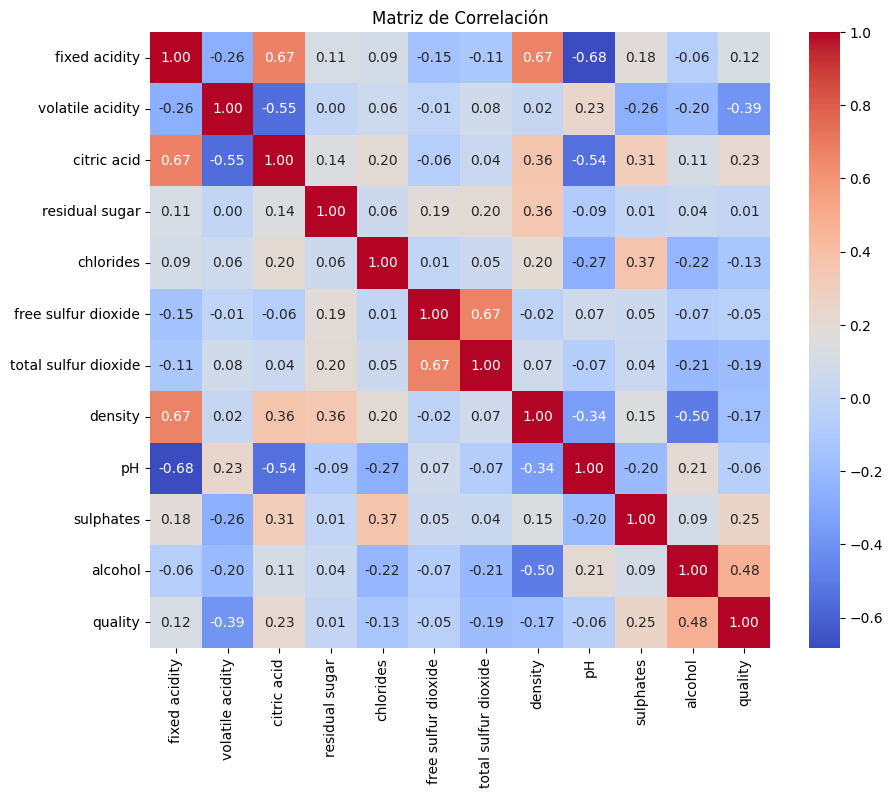

In [14]:
## Exploracion
#Matriz de correlacion versión visual con seaborn

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de Correlación')
plt.show()

In [15]:
## Exploracion
# Matriz de corrlacion con altair

correlation_matrix = df.corr().reset_index().melt(id_vars='index')
correlation_matrix.columns = ['Variable1', 'Variable2', 'Correlación']

# Crear la matriz de correlación interactiva con Altair
heatmap = alt.Chart(correlation_matrix).mark_rect().encode(
    x=alt.X('Variable2:O', title='', sort=None),
    y=alt.Y('Variable1:O', title='', sort=None),
    color=alt.Color('Correlación:Q', scale=alt.Scale(scheme='spectral')),
    tooltip=['Variable1', 'Variable2', 'Correlación']
).properties(
    width=400,
    height=400,
    title='Matriz de Correlación Interactiva'
)

heatmap.show()


alt.Chart(...)

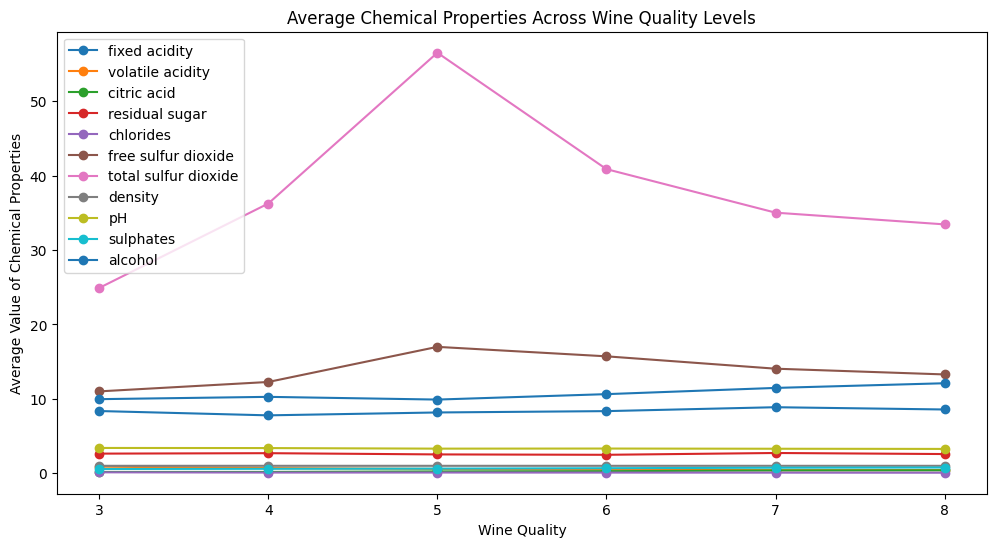

In [16]:
# Group by wine quality and compute the average of each chemical property
quality_means = df.groupby("quality").mean()

# Create a line chart to visualize chemical properties across wine quality levels
plt.figure(figsize=(12, 6))  # Set figure size

# Plot each chemical property as a separate line
for property in quality_means.columns:
    plt.plot(quality_means.index, quality_means[property], marker='o', linestyle='-', label=property)

# Labels and title
plt.xlabel("Wine Quality")  # X-axis label
plt.ylabel("Average Value of Chemical Properties")  # Y-axis label
plt.title("Average Chemical Properties Across Wine Quality Levels")  # Chart title

# Show legend to identify each line
plt.legend(loc='best')

# Display the plot
plt.show()


Hipotesis 1 - De acuerdo con la matriz de correlacion y el grafico de lineas, no queda clara la relacion entre las propiedades físico químicas y la calidad del vino... Por conocimiento general se estima que esta relacion existe, pero ademas juegan las propiedades organolépticas y de preservación, que no estan consideradas acá.

Hipotesis 2 - ¿Qué característica tiene mayor impacto en la calidad del vino?
    Esta hipotesis se va a resolver en varias partes... 
    1.- Correlación
    2.- Feature Importance - más adelante
    3.- Mutual Information - más adelante

In [27]:
# Parte 1 - Correlacioned
correlaciones = df.corr()
correlaciones_rounded = correlaciones.round(2)  # redondeo
# print(correlaciones_rounded)

# Parte 2 - Correlaciones vs Calidad

# Se define que las correlaciones a evaluar deben ser con respecto a la variable (columna) "calidad"
    # se organizan de mayor a menor
    # el [1:] excluye la correlacion máxima, es decir, 1:1, que resulta de correlacionar calidad con calidad. como no tiene sentido, se elimina
    # de aca puedo ver en orden ascendente como correlacionan las cadacteristicas f/q con la calidad
componentes_principales = correlaciones['quality'].sort_values(ascending=False)[1:]

# Obtén las mejores correlaciones
mejores_correlaciones = correlaciones_rounded.loc[componentes_principales.index,'quality']
print(mejores_correlaciones)


alcohol                 0.48
sulphates               0.25
citric acid             0.23
sulfur_ratio            0.19
fixed acidity           0.12
residual sugar          0.01
free sulfur dioxide    -0.05
pH                     -0.06
chlorides              -0.13
density                -0.17
total sulfur dioxide   -0.19
volatile acidity       -0.39
Name: quality, dtype: float64


Hipotesis 2 - Las propiedades f/q que más influyen en la calidad del vino son el contenido de alcohol y la acidéz volátil

Hipotesis 3 - ¿¿Cómo influencia el sulfur ratio en la calidad del vino?

In [24]:
import plotly.express as px

# Step 1: Create the sulfur_ratio variable (rounded to 4 decimal places)
df["sulfur_ratio"] = (df["free sulfur dioxide"] / df["total sulfur dioxide"]).round(4)

# Step 2: Group by quality and compute mean, min, and max sulfur_ratio (rounded)
sulfur_stats = df.groupby("quality")["sulfur_ratio"].agg(
    avg_sulfur_ratio=lambda x: round(x.mean(), 4),
    min_sulfur_ratio=lambda x: round(x.min(), 4),
    max_sulfur_ratio=lambda x: round(x.max(), 4)
).reset_index()

# Step 3: Create an interactive bar chart
fig = px.bar(
    sulfur_stats, 
    x="quality", 
    y="avg_sulfur_ratio",
    text="avg_sulfur_ratio",
    hover_data=["min_sulfur_ratio", "max_sulfur_ratio"],
    title="Average Sulfur Ratio by Wine Quality",
    labels={"avg_sulfur_ratio": "Average Sulfur Ratio", "quality": "Wine Quality"}
)

# Show the interactive chart
fig.show()


Hipotesis 3 - No hay una relacion clara entre el sulfur ratio y la calidad del vino

Hipotesis 4 - Modelo de Machine Learning

Se asume que la calidad del vino es una variable categórica, y no continua, por lo que se va a trabajar con:
- Decision Tree - Calidad baja (3-4), media (5-6), alta (7-8)
- Regresion logística 